In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from dataLoader import *

results_df_user = pd.DataFrame()
df = getdf()
print(df)

       Class  User         X0          Y0         Z0         X1          Y1   
0          0     0   0.000000    0.000000   0.000000   0.000000    0.000000  \
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2  ...       

In [32]:
drop_indices = np.random.choice(df.index, 75000, replace=False)
df = df.drop(drop_indices)
print(df)


       Class  User         X0          Y0         Z0         X1          Y1   
30         1     0  57.508629   71.694971 -60.852055  60.407223   10.149732  \
33         1     0  57.188299   71.969974 -61.055158  60.051138   10.398977   
82         1     0  63.875542   11.265820 -66.562117  34.697904   81.360236   
94         1     0  59.753571   10.395100 -70.890266  33.131649   80.909487   
140        1     0  60.789265   10.549338 -69.500335  33.309423   80.885404   
...      ...   ...        ...         ...        ...        ...         ...   
78030      5    14  81.247454   28.307516 -52.904006  61.205550  101.881663   
78048      5    14 -29.906218   77.238142 -18.057246 -22.717447  104.275584   
78064      5    14  88.760663   59.931435 -63.671039  -2.155721  125.068618   
78088      5    14  54.445660  129.540360 -42.997068  -1.729310   97.508806   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   

              Z1         X2          Y2  ...       

In [33]:
X_train, X_test, y_train, y_test = get_test_training_df(df,0.20)


This is just a test

In [34]:
X_train

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
66052,68.738708,128.105474,-5.488684,5.559210,26.112569,6.302369,62.919335,89.533799,-8.336592,61.2051140172061,...,0,0,0,0,0,0,0,0,0,0
69838,-4.906348,130.048830,-52.140558,45.946700,127.921080,-44.965315,-26.072474,86.078345,-25.734567,48.9024715111702,...,0,0,0,0,0,0,0,0,0,0
49491,72.127058,80.083286,-60.380138,4.106553,97.199885,-24.227783,73.326569,53.037698,-59.981453,45.6885570723532,...,0,0,0,0,0,0,0,0,0,0
64570,25.624893,134.027465,27.196796,55.415851,88.793568,7.975784,-10.463613,80.078792,5.584567,3.76372331238731,...,21.4187817020854,0,0,0,0,0,0,0,0,0
60726,41.302664,88.306918,-3.441373,66.511165,134.059287,-11.750093,49.096419,152.001589,-16.836969,63.8196048658624,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41268,-10.393203,70.143888,-35.785691,69.361984,64.237913,-78.172115,32.389264,78.780663,-53.959387,71.4840241554133,...,0,0,0,0,0,0,0,0,0,0
28155,83.325399,51.916268,-35.614893,86.464613,23.587148,-36.724454,77.148761,-9.413883,-44.882938,53.5260693487309,...,0,0,0,0,0,0,0,0,0,0
28637,76.491468,63.945250,-88.740837,59.178401,68.846571,-64.515610,15.676643,78.670539,-48.147262,37.1167654627538,...,0,0,0,0,0,0,0,0,0,0
32780,109.114267,19.301444,-88.203334,62.662217,136.065563,-25.380329,30.266719,80.790118,-50.024333,61.8499777157171,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_test

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
49146,24.946036,100.770145,-30.161377,68.059183,19.944724,-56.749023,8.204997,95.845209,-19.046336,46.332724841335,...,0,0,0,0,0,0,0,0,0,0
33149,50.205512,155.576662,-13.508367,85.812228,31.349291,-87.996766,47.722232,95.335055,-15.101913,12.9536493458566,...,0,0,0,0,0,0,0,0,0,0
40512,51.815333,-4.593877,-82.774768,68.139097,32.152793,-86.778860,30.805914,76.322802,-60.731578,51.0082716291776,...,0,0,0,0,0,0,0,0,0,0
67105,6.257162,25.310971,9.731169,57.279431,130.285495,2.971433,56.808809,90.385370,-1.715394,60.8656744883721,...,0,0,0,0,0,0,0,0,0,0
62243,11.364516,76.897627,-42.906995,31.624110,79.134162,-44.908065,58.480842,73.186643,-44.309523,54.0923694823834,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69187,-3.695447,129.524389,-44.127041,15.689256,104.924087,-1.130640,-25.763884,88.036371,-16.620928,14.9175164812997,...,-37.0781479400724,98.0727409613955,71.7330156946874,-52.7266125926468,0,0,0,0,0,0
48463,27.987536,6.718929,11.801658,14.419270,92.220208,-77.018356,-6.220804,84.050427,-74.307318,74.5353526996982,...,0,0,0,0,0,0,0,0,0,0
26836,4.136005,88.945992,-38.929586,40.894892,96.176622,-10.663671,56.418408,139.508201,-7.604579,38.74533171233,...,-31.5291351287819,0,0,0,0,0,0,0,0,0
71525,29.337084,2.030049,7.219508,10.445775,75.426829,-58.300874,54.312612,85.052917,-50.891931,30.1966824079271,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# knn = KNeighborsClassifier(n_neighbors=1)
# test_model_and_save_result(knn, "KNN", X_train, X_test, y_train, y_test, results_df_user)
# print(results_df_user.sort_values(by=['acc'], ascending=False))


In [37]:
# df = df.reset_index(drop=True)
# param_grid = {'C':[1],
#               'gamma':[1],
#               'kernel':['rbf']}

param_grid = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001],
              'kernel':[ 'rbf', 'sigmoid' ]}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2, n_jobs=-1)
grid.fit(X_train,y_train)
save_results(grid,X_test, y_test, "SVM", results_df_user)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/pol/dotfiles/dotfiles/.local/share/virtualenvs/MD2-Msi-27M8/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,acc,prec,recall,test f1 score (W)
SVM,0.633871,0.741231,0.633871,0.555334


In [38]:
print(grid.best_params_)


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [39]:
# 3. Get the best estimator with optimal hyperparameters
best_svc = grid.best_estimator_

# 4. Fit the model using the optimal hyperparameters
best_svc.fit(X_train, y_train)

# 5. Retrieve the support vectors
support_vectors = best_svc.support_vectors_
# Access the support vectors and retrieve the number of support vectors
# support_vectors = grid.support_vectors_
num_support_vectors = support_vectors.shape[0]

print("Number of support vectors:", num_support_vectors)

Number of support vectors: 2416


In [40]:
val_accuracy = best_svc.score(X_test, y_test)
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.6338709677419355


In [41]:
cv_accuracy = cross_val_score(best_svc, X_test, y_test, cv=5).mean()
print("Cross-Validation Accuracy:", cv_accuracy)

Cross-Validation Accuracy: 0.4129032258064516


/Users/pol/dotfiles/dotfiles/.local/share/virtualenvs/MD2-Msi-27M8/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [42]:
# Get the indices of the support vectors
support_vector_indices = best_svc.support_

# Inspect the main support vectors
main_support_vectors = X_train.iloc[support_vector_indices]
print("Main support vectors:")
print(main_support_vectors)


Main support vectors:
              X0          Y0         Z0         X1          Y1         Z1   
5703   30.563002  135.149006 -78.979213  54.084874   90.475213 -45.956586  \
5395   73.942190  128.366016 -56.313855  -6.888057   74.000941 -46.584328   
5815   52.997729   91.657617 -46.157552 -12.553861   51.792506 -63.485508   
7431   10.499785  135.004311 -36.675038  58.371888   60.761394 -85.991251   
5071   -8.269335   77.298396 -31.374891  51.419201  137.960685 -40.320016   
...          ...         ...        ...        ...         ...        ...   
77324  93.707183   59.888498 -57.929556  58.516500  141.373618 -25.646370   
76114  54.977188  145.002848  32.358757  87.663147   44.345400 -44.134755   
73550  -9.542171   81.282357  12.649004  69.071606  139.871613   7.241253   
72522  15.123543   93.911954  17.121236  72.880423   57.927791 -46.344878   
74013  42.241275  102.601383  11.367754  87.205503   75.680415 -44.743584   

              X2          Y2         Z2              

Analysis of the main support vectors

In [43]:
from matplotlib import pyplot as plt

# Get the indices of the support vectors
support_vector_indices = best_svc.support_

# Get the support vectors from the training data
support_vectors = X_train.iloc[support_vector_indices]

# Get the class labels of the support vectors
support_vector_labels = y_train.iloc[support_vector_indices]

# Count the number of support vectors for each class
support_vector_counts = support_vector_labels.value_counts()

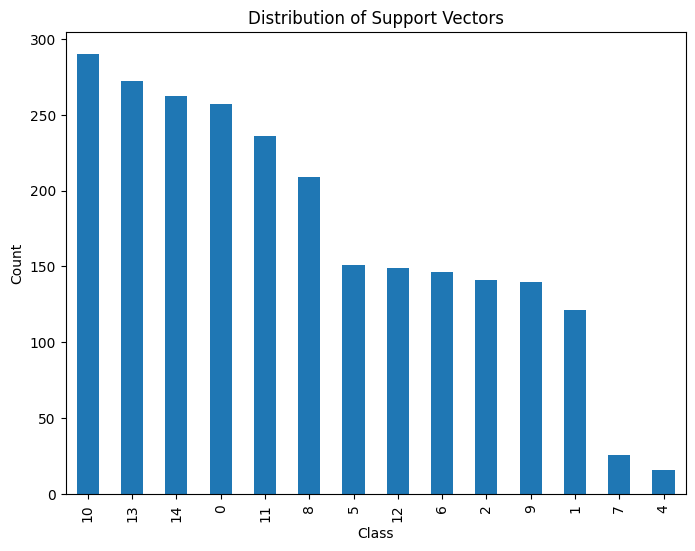

In [44]:

# Plot the distribution of support vectors across classes
plt.figure(figsize=(8, 6))
support_vector_counts.plot(kind='bar')
plt.title('Distribution of Support Vectors')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [45]:
# Print the statistics of the support vectors
print("Support Vector Statistics:")
print("Number of support vectors:", len(support_vectors))

Support Vector Statistics:
Number of support vectors: 2416


In [46]:
print("Class-wise distribution:")
print(support_vector_counts)

Class-wise distribution:
User
10    290
13    272
14    262
0     257
11    236
8     209
5     151
12    149
6     146
2     141
9     140
1     121
7      26
4      16
Name: count, dtype: int64


In [47]:
# Plot the support vectors in a scatter plot (for 2D data)
if X_train.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='viridis', label='Training Data')
    plt.scatter(support_vectors.iloc[:, 0], support_vectors.iloc[:, 1], c='red', label='Support Vectors')
    plt.title('Support Vectors')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


In [48]:
distances = best_svc.decision_function(support_vectors)
print("Distances from Decision Boundary:")
print(distances)


Distances from Decision Boundary:
[[13.30952305  3.81244407  1.76415664 ...  5.03614313  9.19318083
  10.20414043]
 [13.30955832  9.19622732  3.77785755 ... 12.29296978 10.24835021
   6.91871803]
 [13.3095246   3.81254632  1.77310718 ...  5.04780892 10.18654665
  10.22043097]
 ...
 [12.23992482  1.79654436  2.81726596 ...  3.87470169  7.02082659
  13.30952401]
 [11.22853948  1.81438843  4.83361143 ...  2.81423794 10.22041281
  13.30952397]
 [11.23305479  1.79226338  2.80428649 ...  3.87849398  9.20783514
  13.30952138]]


Support Vectors and Contributions only make sense when we are talking about linear SVMs so we will not use them as our best model is an RBF kernel

In [49]:
# weights = best_svc.coef_
# print("Support Vector Weights:")
# print(weights)


In [50]:
# contributions = np.abs(weights @ support_vectors.T + best_svc.intercept_)
# print("Support Vector Contributions:")
# print(contributions)


In [51]:
# svm = SVC(kernel='linear', gamma=0.0001, C = 10)
# svm.fit(X_train, y_train)
# save_results(svm,X_test, y_test, "SVM", results_df_user)
# test_model_and_save_result(svm, "SVM linear", X_train, X_test, y_train, y_test, results_df)


In [52]:
# svm = SVC(kernel='poly', gamma=0.0001, C = 10)
# test_model_and_save_result(svm, "polynomial", X_train, X_test, y_train, y_test, results_df)
